In [1]:
from qiskit import *
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

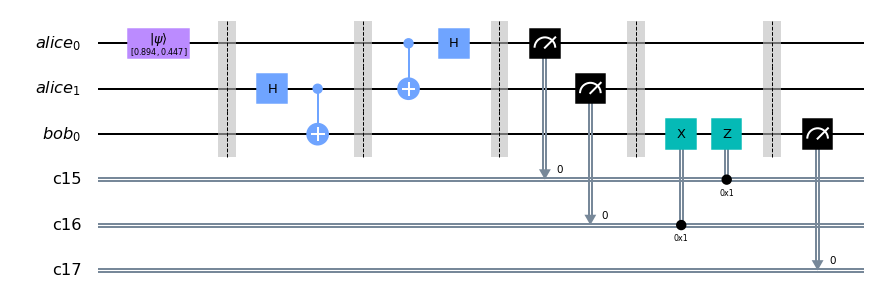

In [30]:
Alices_q = QuantumRegister(2, name='alice')
Bobs_q = QuantumRegister(1, name='bob')
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
c3 = ClassicalRegister(1)
qc = QuantumCircuit(Alices_q, Bobs_q, c1, c2, c3)

qc.initialize([np.sqrt(0.80), np.sqrt(0.20)], 0)
qc.barrier()

qc.h(Alices_q[1])
qc.cx(Alices_q[1], Bobs_q[0])
qc.barrier()

qc.cx(Alices_q[0], Alices_q[1])
qc.h(Alices_q[0])
qc.barrier()

qc.measure(Alices_q[0], c1)
qc.measure(Alices_q[1], c2)
qc.barrier()

qc.x(Bobs_q).c_if(c2, 1)
qc.z(Bobs_q).c_if(c1, 1)
qc.barrier()

qc.measure(Bobs_q, c3)

qc.draw(output='mpl')

{'0 0 0': 196, '0 0 1': 207, '0 1 0': 205, '0 1 1': 223, '1 0 0': 56, '1 0 1': 42, '1 1 0': 56, '1 1 1': 39}


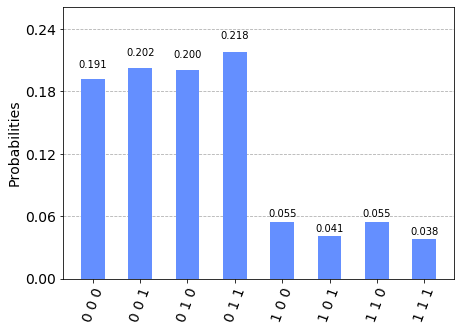

In [38]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
print(counts)
plot_histogram(counts)